<a href="https://colab.research.google.com/github/Captsahil/Marketing-Research-Method-Sahil-Bharadwaj/blob/main/MMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.optimize as opt

# Apply Stock Effect (Lagged impact of past advertising)
df['TV_Stock'] = df['TV_Spend'].rolling(window=4, min_periods=1).mean()
df['Radio_Stock'] = df['Radio_Spend'].rolling(window=4, min_periods=1).mean()
df['Print_Stock'] = df['Print_Spend'].rolling(window=4, min_periods=1).mean()
df['Search_Stock'] = df['Search_Spend'].rolling(window=4, min_periods=1).mean()
df['YouTube_Stock'] = df['YouTube_Spend'].rolling(window=4, min_periods=1).mean()
df['Social_Stock'] = df['Social Media_Spend'].rolling(window=4, min_periods=1).mean()

# Apply Saturation Effect using an S-curve function
def s_curve(x, alpha=0.0005, beta=0.8):
    return alpha * (x ** beta)

df['TV_Sat'] = df['TV_Stock'].apply(s_curve)
df['Radio_Sat'] = df['Radio_Stock'].apply(s_curve)
df['Print_Sat'] = df['Print_Stock'].apply(s_curve)
df['Search_Sat'] = df['Search_Stock'].apply(s_curve)
df['YouTube_Sat'] = df['YouTube_Stock'].apply(s_curve)
df['Social_Sat'] = df['Social_Stock'].apply(s_curve)

# Define Sales Model with Saturation Effects
def sales_model(spend_allocations, *params):
    intercept, tv_coeff, radio_coeff, print_coeff, search_coeff, yt_coeff, social_coeff = params
    return (
        intercept +
        tv_coeff * s_curve(spend_allocations[0]) +
        radio_coeff * s_curve(spend_allocations[1]) +
        print_coeff * s_curve(spend_allocations[2]) +
        search_coeff * s_curve(spend_allocations[3]) +
        yt_coeff * s_curve(spend_allocations[4]) +
        social_coeff * s_curve(spend_allocations[5])
    )

# Budget Optimization Function
def optimize_budget(total_budget, initial_allocations, params):
    def constraint(x):
        return total_budget - np.sum(x)

    bounds = [(0, total_budget)] * len(initial_allocations)
    result = opt.minimize(
        lambda x: -sales_model(x, *params),  # Maximize sales (negative for minimization)
        initial_allocations,
        bounds=bounds,
        constraints={'type': 'eq', 'fun': constraint}
    )
    return result.x

# Example: Optimizing with a total budget of $20,000
params = [50, 3, 2.5, 2, 1.8, 2.2, 1.5]  # Example coefficients for ad effectiveness
initial_allocations = [3000, 3000, 3000, 3000, 4000, 4000]  # Initial budget allocation
optimized_allocations = optimize_budget(20000, initial_allocations, params)

print("Optimized Budget Allocation:", optimized_allocations)

Optimized Budget Allocation: [3000. 3000. 3000. 3000. 4000. 4000.]


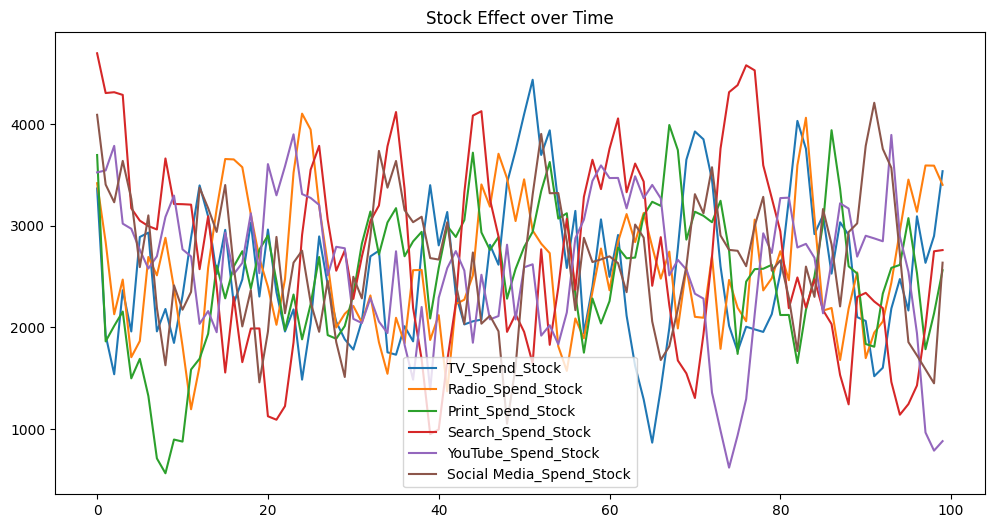

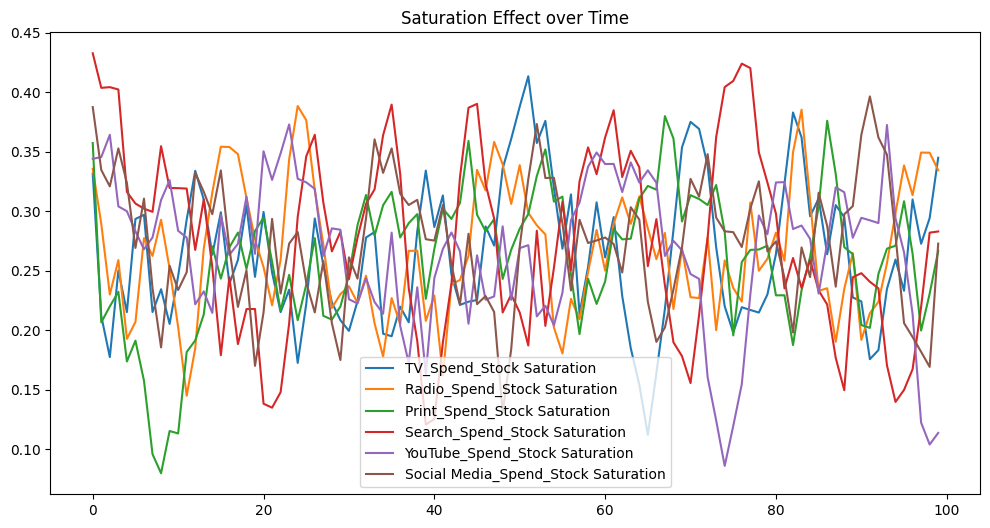

      TV_Spend  Radio_Spend  Print_Spend  Search_Spend  YouTube_Spend  \
0  3366.734278  3417.943750  3695.339841   4695.524471    3524.601972   
1   479.365468  2260.507265    30.861177   3913.884313    3563.207012   
2   774.303083   711.126058  2320.036162   4328.532112    4268.181726   
3  4842.862792  3494.652162  2579.323420   4207.250566     725.732697   
4  1746.688374   364.268412  1069.069656    238.709807    3323.686050   

   Social Media_Spend  TV_Spend_Stock  Radio_Spend_Stock  Print_Spend_Stock  \
0         4090.568617     3366.734278        3417.943750        3695.339841   
1         2718.584265     1923.049873        2839.225508        1863.100509   
2         2883.129960     1540.134276        2129.859024        2015.412393   
3         4857.977773     2365.816405        2471.057309        2156.390150   
4         2603.074657     1960.804929        1707.638474        1499.822604   

   Search_Spend_Stock  YouTube_Spend_Stock  Social Media_Spend_Stock  \
0         4695

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Apply Stock Effect (Lagged impact of past advertising)
def apply_stock_effect(df, spend_columns, window=4):
    for col in spend_columns:
        df[f'{col}_Stock'] = df[col].rolling(window=window, min_periods=1).mean()
    return df

# Apply Saturation Effect using an S-curve function
def s_curve(x, alpha=0.0005, beta=0.8):
    return alpha * (x ** beta)

def apply_saturation_effect(df, stock_columns):
    for col in stock_columns:
        df[f'{col}_Sat'] = df[col].apply(s_curve)
    return df

# Example Usage
spend_columns = ['TV_Spend', 'Radio_Spend', 'Print_Spend', 'Search_Spend', 'YouTube_Spend', 'Social Media_Spend']
df = pd.DataFrame({col: np.random.rand(100) * 5000 for col in spend_columns})

df = apply_stock_effect(df, spend_columns)
stock_columns = [f'{col}_Stock' for col in spend_columns]
df = apply_saturation_effect(df, stock_columns)

# Plot Stock Effect and Saturation Effect
plt.figure(figsize=(12, 6))
for col in stock_columns:
    plt.plot(df.index, df[col], label=f"{col}")
plt.title("Stock Effect over Time")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for col in stock_columns:
    plt.plot(df.index, df[f'{col}_Sat'], label=f"{col} Saturation")
plt.title("Saturation Effect over Time")
plt.legend()
plt.show()

print(df.head())


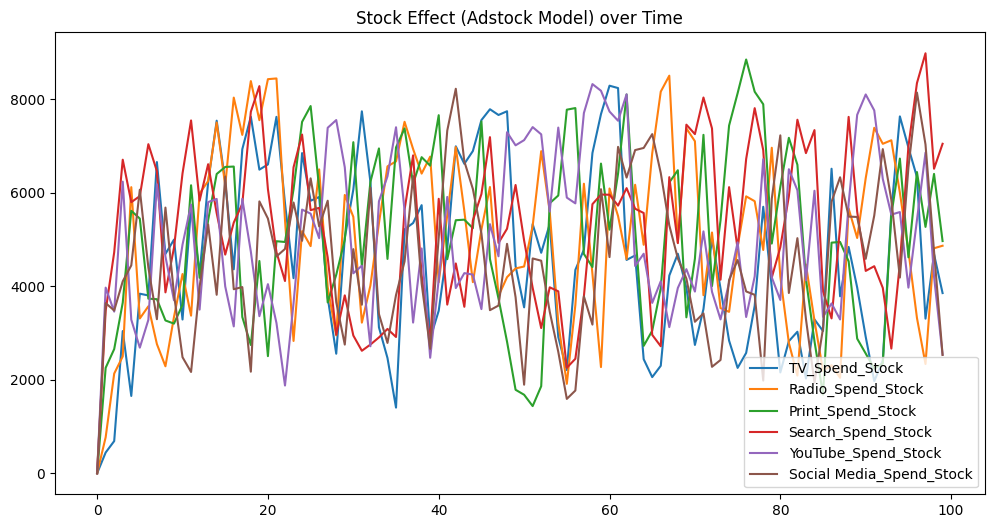

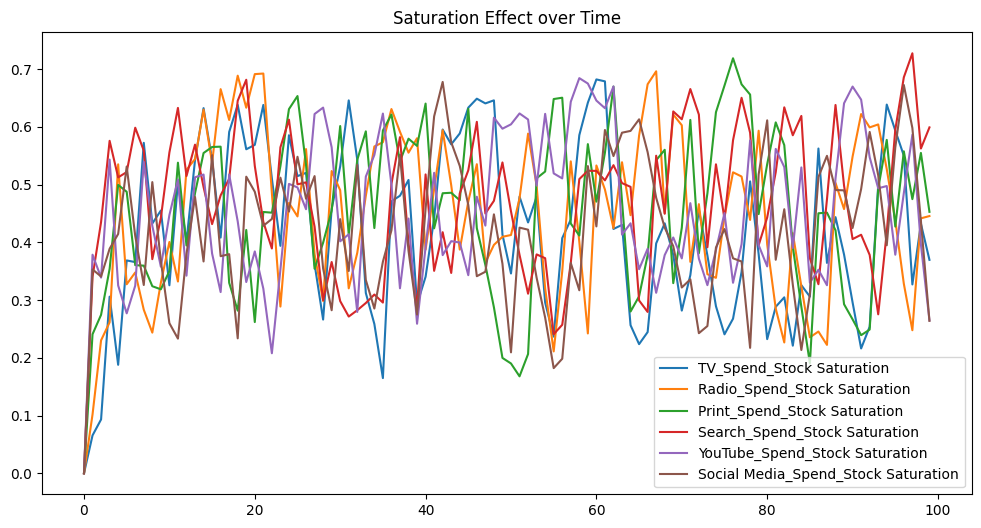

      TV_Spend  Radio_Spend  Print_Spend  Search_Spend  YouTube_Spend  \
0  1140.812873   295.203240  1103.222839   3428.909862    1050.380070   
1   444.177604   769.918443  2255.982769   3477.648064    3971.681430   
2   466.949267  1748.190919  1529.027989   2988.149389    1472.368435   
3  2697.632848  1433.674317  2322.136220   4344.231204    4509.132817   
4   133.126377  4870.232640  3790.051281   2445.156924     166.127140   

   Social Media_Spend  TV_Spend_Stock  Radio_Spend_Stock  Print_Spend_Stock  \
0          463.864922        0.000000           0.000000           0.000000   
1         3640.041409      444.177604         769.918443        2255.982769   
2         1662.603804      689.038069        2133.150141        2657.019373   
3         2364.983628     3042.151883        2500.249388        3650.645906   
4         2394.163584     1654.202318        6120.357334        5615.374234   

   Search_Spend_Stock  YouTube_Spend_Stock  Social Media_Spend_Stock  \
0            0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Adstock transformation function
def adstock(x, decay=0.5):
    result = np.zeros_like(x)
    for i in range(1, len(x)):
        result[i] = x[i] + decay * result[i - 1]
    return result

# Apply Stock Effect using Adstock Model
def apply_adstock_effect(df, spend_columns, decay=0.5):
    for col in spend_columns:
        df[f'{col}_Stock'] = adstock(df[col].values, decay)
    return df

# Apply Saturation Effect using an S-curve function
def s_curve(x, alpha=0.0005, beta=0.8):
    return alpha * (x ** beta)

def apply_saturation_effect(df, stock_columns):
    for col in stock_columns:
        df[f'{col}_Sat'] = df[col].apply(s_curve)
    return df

# Example Usage
spend_columns = ['TV_Spend', 'Radio_Spend', 'Print_Spend', 'Search_Spend', 'YouTube_Spend', 'Social Media_Spend']
df = pd.DataFrame({col: np.random.rand(100) * 5000 for col in spend_columns})

df = apply_adstock_effect(df, spend_columns)
stock_columns = [f'{col}_Stock' for col in spend_columns]
df = apply_saturation_effect(df, stock_columns)

# Plot Stock Effect and Saturation Effect
plt.figure(figsize=(12, 6))
for col in stock_columns:
    plt.plot(df.index, df[col], label=f"{col}")
plt.title("Stock Effect (Adstock Model) over Time")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for col in stock_columns:
    plt.plot(df.index, df[f'{col}_Sat'], label=f"{col} Saturation")
plt.title("Saturation Effect over Time")
plt.legend()
plt.show()

print(df.head())




Optimized Budget for TV_Spend: $3000.00
Optimized Budget for Radio_Spend: $3000.00
Optimized Budget for Print_Spend: $3000.00
Optimized Budget for Search_Spend: $3000.00
Optimized Budget for YouTube_Spend: $4000.00
Optimized Budget for Social Media_Spend: $4000.00


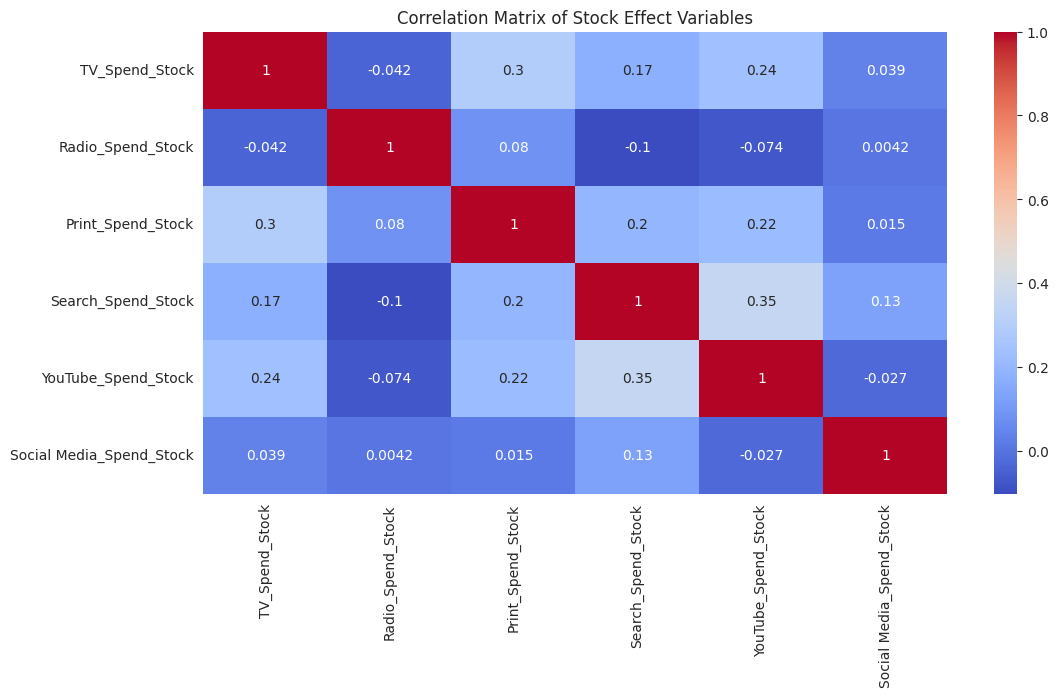

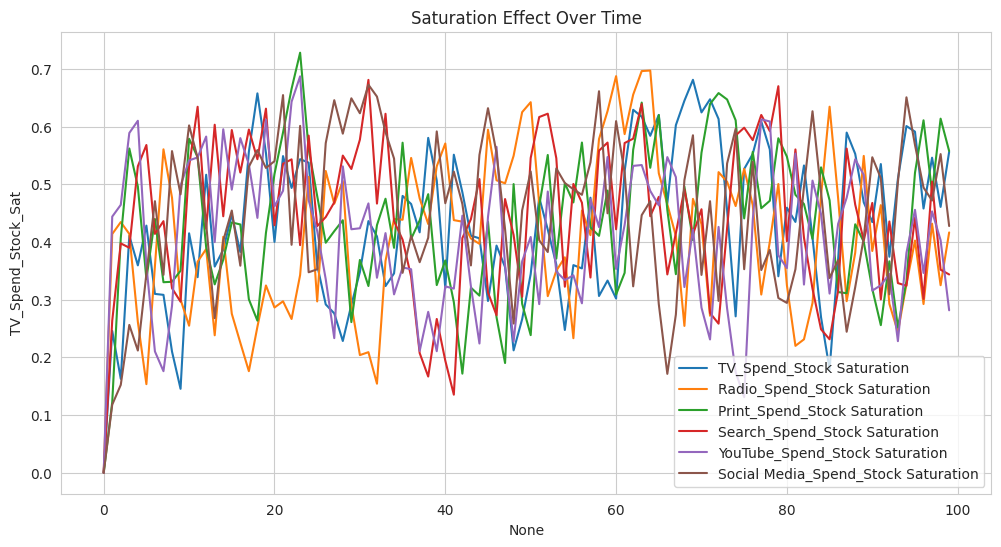

      TV_Spend  Radio_Spend  Print_Spend  Search_Spend  YouTube_Spend  \
0  2796.996999  3946.054551   594.845177   1036.042911    1658.957313   
1  2315.108192  4441.241417   967.125247   2527.518222    4848.815347   
2   225.170437  2498.748826  3864.283439   2959.998138    2704.456626   
3  3710.259968  2083.115876  4337.215187   2011.753342    4338.748145   
4  1523.214729   280.312523  2315.661145   4006.378977    3763.210472   

   Social Media_Spend  TV_Spend_Stock  Radio_Spend_Stock  Print_Spend_Stock  \
0         3890.910900        0.000000           0.000000           0.000000   
1          925.109289     2315.108192        4441.241417         967.125247   
2          810.155126     1382.724533        4719.369534        4347.846063   
3         1802.880401     4401.622235        4442.800644        6511.138218   
4          702.925106     3724.025847        2501.712845        5571.230254   

   Search_Spend_Stock  YouTube_Spend_Stock  Social Media_Spend_Stock  \
0            0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt

# Adstock transformation function
def adstock(x, decay=0.5):
    result = np.zeros_like(x)
    for i in range(1, len(x)):
        result[i] = x[i] + decay * result[i - 1]
    return result

# Apply Stock Effect using Adstock Model
def apply_adstock_effect(df, spend_columns, decay=0.5):
    for col in spend_columns:
        df[f'{col}_Stock'] = adstock(df[col].values, decay)
    return df

# Apply Saturation Effect using an S-curve function
def s_curve(x, alpha=0.0005, beta=0.8):
    return alpha * (x ** beta)

def apply_saturation_effect(df, stock_columns):
    for col in stock_columns:
        df[f'{col}_Sat'] = df[col].apply(s_curve)
    return df

# Example Usage
spend_columns = ['TV_Spend', 'Radio_Spend', 'Print_Spend', 'Search_Spend', 'YouTube_Spend', 'Social Media_Spend']
df = pd.DataFrame({col: np.random.rand(100) * 5000 for col in spend_columns})

df = apply_adstock_effect(df, spend_columns)
stock_columns = [f'{col}_Stock' for col in spend_columns]
df = apply_saturation_effect(df, stock_columns)

# Budget Optimization Function
def optimize_budget(total_budget, initial_allocations, params):
    def constraint(x):
        return total_budget - np.sum(x)

    bounds = [(0, total_budget)] * len(initial_allocations)
    result = opt.minimize(
        lambda x: -np.sum([params[i] * s_curve(x[i]) for i in range(len(x))]),  # Maximize sales impact
        initial_allocations,
        bounds=bounds,
        constraints={'type': 'eq', 'fun': constraint}
    )
    return result.x

# Define parameters for optimization (effectiveness of each channel)
params = [3, 2.5, 2, 1.8, 2.2, 1.5]  # Example coefficients
initial_allocations = [3000, 3000, 3000, 3000, 4000, 4000]  # Initial budget allocation
optimized_allocations = optimize_budget(20000, initial_allocations, params)

# Print optimized budget allocation
for i, col in enumerate(spend_columns):
    print(f"Optimized Budget for {col}: ${optimized_allocations[i]:.2f}")

# Enhanced Visualization using Seaborn
sns.set_style("whitegrid")

# Heatmap for Stock Effect
plt.figure(figsize=(12, 6))
sns.heatmap(df[stock_columns].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Stock Effect Variables")
plt.show()

# Line Plot for Saturation Effect
plt.figure(figsize=(12, 6))
for col in stock_columns:
    sns.lineplot(x=df.index, y=df[f'{col}_Sat'], label=f"{col} Saturation")
plt.title("Saturation Effect Over Time")
plt.legend()
plt.show()

print(df.head())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/

Optimized Budget Allocation:
TV Spend: 8016.97
Radio Spend: 150.23
Print Spend: 0.00
Total Budget: 8167.20


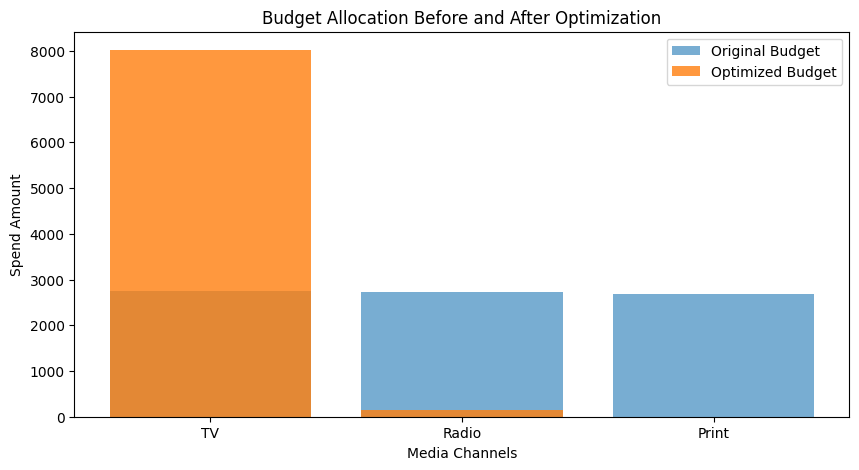

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

# Load dataset
file_path = "MMM brand data.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# Define Adstock transformation
def adstock_transform(spend_series, decay_factor=0.5):
    adstocked = np.zeros_like(spend_series)
    adstocked[0] = spend_series[0]  # Initial value
    for t in range(1, len(spend_series)):
        adstocked[t] = spend_series[t] + decay_factor * adstocked[t - 1]
    return adstocked

# Define Saturation transformation (Hill function)
def saturation_transform(spend_series, s=5000, h=2):
    return (spend_series**h) / (spend_series**h + s**h)

# Apply transformations to media spends
df["Adstock_TV"] = adstock_transform(df["TV_Spend"], decay_factor=0.6)
df["Adstock_Radio"] = adstock_transform(df["Radio_Spend"], decay_factor=0.5)
df["Adstock_Print"] = adstock_transform(df["Print_Spend"], decay_factor=0.4)

df["Saturated_TV"] = saturation_transform(df["TV_Spend"], s=10000, h=2)
df["Saturated_Radio"] = saturation_transform(df["Radio_Spend"], s=8000, h=2)
df["Saturated_Print"] = saturation_transform(df["Print_Spend"], s=6000, h=2)

# Prepare data for regression model
X = df[["Adstock_TV", "Adstock_Radio", "Adstock_Print", "Saturated_TV", "Saturated_Radio", "Saturated_Print"]]
y = df["Sales"]

# Train regression model
model = LinearRegression()
model.fit(X, y)

# Define objective function for optimization (negative sales because we maximize)
def objective(spend):
    adstock_tv = adstock_transform(np.array([spend[0]]*len(df)), decay_factor=0.6)[-1]
    adstock_radio = adstock_transform(np.array([spend[1]]*len(df)), decay_factor=0.5)[-1]
    adstock_print = adstock_transform(np.array([spend[2]]*len(df)), decay_factor=0.4)[-1]

    saturated_tv = saturation_transform(spend[0], s=10000, h=2)
    saturated_radio = saturation_transform(spend[1], s=8000, h=2)
    saturated_print = saturation_transform(spend[2], s=6000, h=2)

    X_test = np.array([[adstock_tv, adstock_radio, adstock_print, saturated_tv, saturated_radio, saturated_print]])
    predicted_sales = model.predict(X_test)[0]

    return -predicted_sales  # We minimize negative sales to maximize it

# Set initial budget (current spend levels)
initial_budget = [df["TV_Spend"].mean(), df["Radio_Spend"].mean(), df["Print_Spend"].mean()]

# Budget constraint (Total Budget must remain the same)
total_budget = sum(initial_budget)

def budget_constraint(spend):
    return total_budget - sum(spend)

# Bounds: Ensure spend stays positive
bounds = [(0, total_budget), (0, total_budget), (0, total_budget)]

# Define constraints
constraints = {"type": "eq", "fun": budget_constraint}

# Perform optimization
optimized_result = minimize(objective, initial_budget, bounds=bounds, constraints=constraints, method='SLSQP')

# Extract optimized spends
optimized_tv, optimized_radio, optimized_print = optimized_result.x

# Print results
print("Optimized Budget Allocation:")
print(f"TV Spend: {optimized_tv:.2f}")
print(f"Radio Spend: {optimized_radio:.2f}")
print(f"Print Spend: {optimized_print:.2f}")
print(f"Total Budget: {sum(optimized_result.x):.2f}")

# Visualize original vs optimized budget allocation
channels = ["TV", "Radio", "Print"]
original_budget = initial_budget
optimized_budget = [optimized_tv, optimized_radio, optimized_print]

plt.figure(figsize=(10, 5))
plt.bar(channels, original_budget, alpha=0.6, label="Original Budget")
plt.bar(channels, optimized_budget, alpha=0.8, label="Optimized Budget")
plt.xlabel("Media Channels")
plt.ylabel("Spend Amount")
plt.title("Budget Allocation Before and After Optimization")
plt.legend()
plt.show()


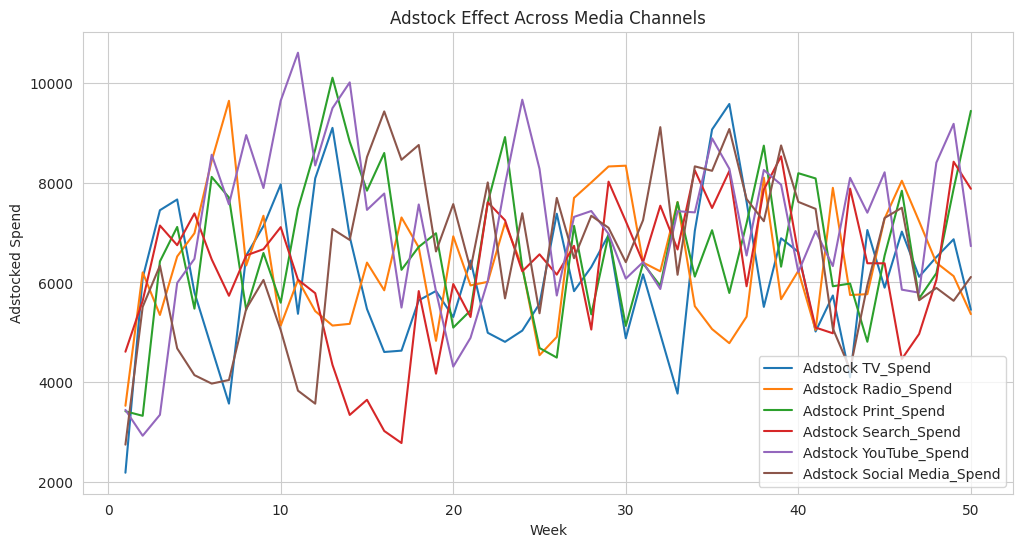

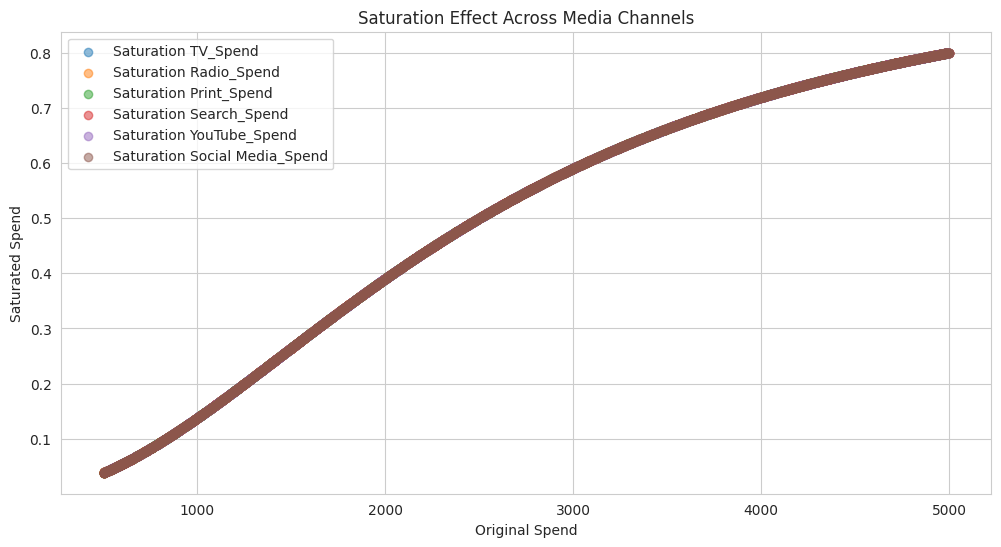

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
file_path = "MMM brand data.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# Identify all media spend columns (excluding non-media columns)
media_columns = ["TV_Spend", "Radio_Spend", "Print_Spend", "Search_Spend", "YouTube_Spend", "Social Media_Spend"]

# Define Adstock transformation
def adstock_transform(spend_series, decay_factor=0.5):
    adstocked = np.zeros_like(spend_series)
    adstocked[0] = spend_series[0]  # Initial value
    for t in range(1, len(spend_series)):
        adstocked[t] = spend_series[t] + decay_factor * adstocked[t - 1]
    return adstocked

# Define Saturation transformation (Hill function)
def saturation_transform(spend_series, s=5000, h=2):
    return (spend_series**h) / (spend_series**h + s**h)

# Apply Adstock and Saturation effects to all media channels
for media in media_columns:
    df[f"Adstock_{media}"] = adstock_transform(df[media], decay_factor=0.6)  # Adjust decay factor as needed
    df[f"Saturated_{media}"] = saturation_transform(df[media], s=df[media].max()/2, h=2)  # Adjust saturation params

# Plot Adstock effect for all media channels
plt.figure(figsize=(12, 6))
for media in media_columns:
    plt.plot(df["Week"][:50], df[f"Adstock_{media}"][:50], label=f"Adstock {media}")
plt.xlabel("Week")
plt.ylabel("Adstocked Spend")
plt.title("Adstock Effect Across Media Channels")
plt.legend()
plt.show()

# Plot Saturation effect for all media channels
plt.figure(figsize=(12, 6))
for media in media_columns:
    plt.scatter(df[media], df[f"Saturated_{media}"], alpha=0.5, label=f"Saturation {media}")
plt.xlabel("Original Spend")
plt.ylabel("Saturated Spend")
plt.title("Saturation Effect Across Media Channels")
plt.legend()
plt.show()


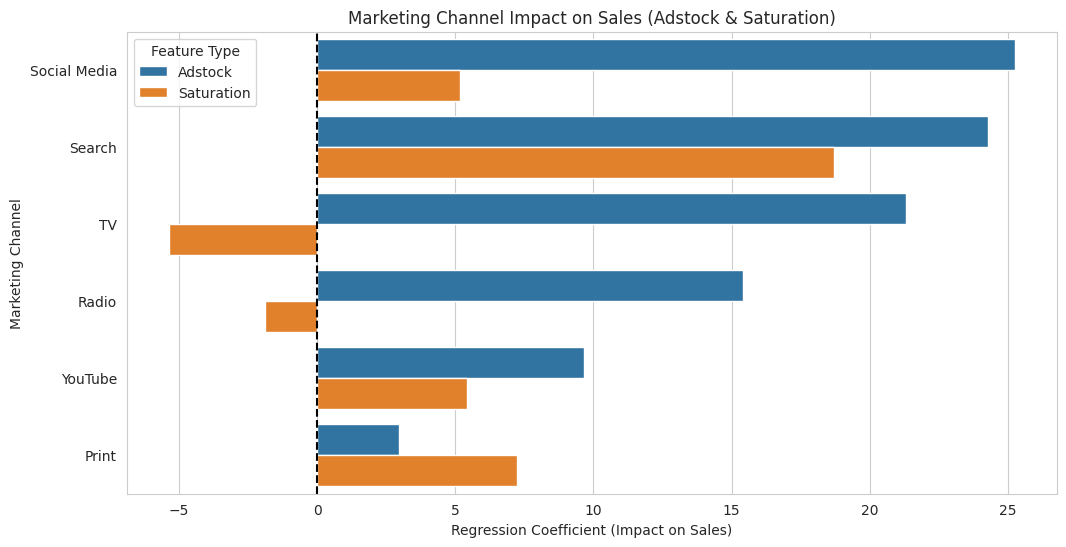

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "MMM brand data.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# Identify all media spend columns
media_columns = ["TV_Spend", "Radio_Spend", "Print_Spend", "Search_Spend", "YouTube_Spend", "Social Media_Spend"]

# Define Adstock transformation
def adstock_transform(spend_series, decay_factor=0.5):
    adstocked = np.zeros_like(spend_series)
    adstocked[0] = spend_series[0]  # Initial value
    for t in range(1, len(spend_series)):
        adstocked[t] = spend_series[t] + decay_factor * adstocked[t - 1]
    return adstocked

# Define Saturation transformation (Hill function)
def saturation_transform(spend_series, s=5000, h=2):
    return (spend_series**h) / (spend_series**h + s**h)

# Apply Adstock and Saturation transformations
for media in media_columns:
    df[f"Adstock_{media}"] = adstock_transform(df[media], decay_factor=0.6)
    df[f"Saturated_{media}"] = saturation_transform(df[media], s=df[media].max()/2, h=2)

# Prepare feature matrix (X) and target variable (y)
X = df[[f"Adstock_{media}" for media in media_columns] + [f"Saturated_{media}" for media in media_columns]]
y = df["Sales"]

# Standardize features for better interpretability
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_scaled, y)

# Get coefficients & impact of each channel
impact_df = pd.DataFrame({
    "Marketing Channel": [media.replace("_Spend", "") for media in media_columns] * 2,
    "Feature Type": ["Adstock"] * len(media_columns) + ["Saturation"] * len(media_columns),
    "Impact on Sales": model.coef_
})

# Sort by absolute impact
impact_df["Absolute Impact"] = impact_df["Impact on Sales"].abs()
impact_df = impact_df.sort_values(by="Absolute Impact", ascending=False).drop(columns=["Absolute Impact"])

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x="Impact on Sales", y="Marketing Channel", hue="Feature Type", data=impact_df)
plt.axvline(0, color="black", linestyle="dashed")
plt.xlabel("Regression Coefficient (Impact on Sales)")
plt.title("Marketing Channel Impact on Sales (Adstock & Saturation)")
plt.legend(title="Feature Type")
plt.show()


<ipython-input-8-f2ba26672de7>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[channel + "_Adstock"] = df[channel + "_Adstock"]
<ipython-input-8-f2ba26672de7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[channel + "_Saturation"] = df[channel + "_Saturation"]
<ipython-input-8-f2ba26672de7>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     3369.
Date:                Sun, 09 Feb 2025   Prob (F-statistic):               0.00
Time:                        11:25:38   Log-Likelihood:                -15708.
No. Observations:                3000   AIC:                         3.145e+04
Df Residuals:                    2984   BIC:                         3.154e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

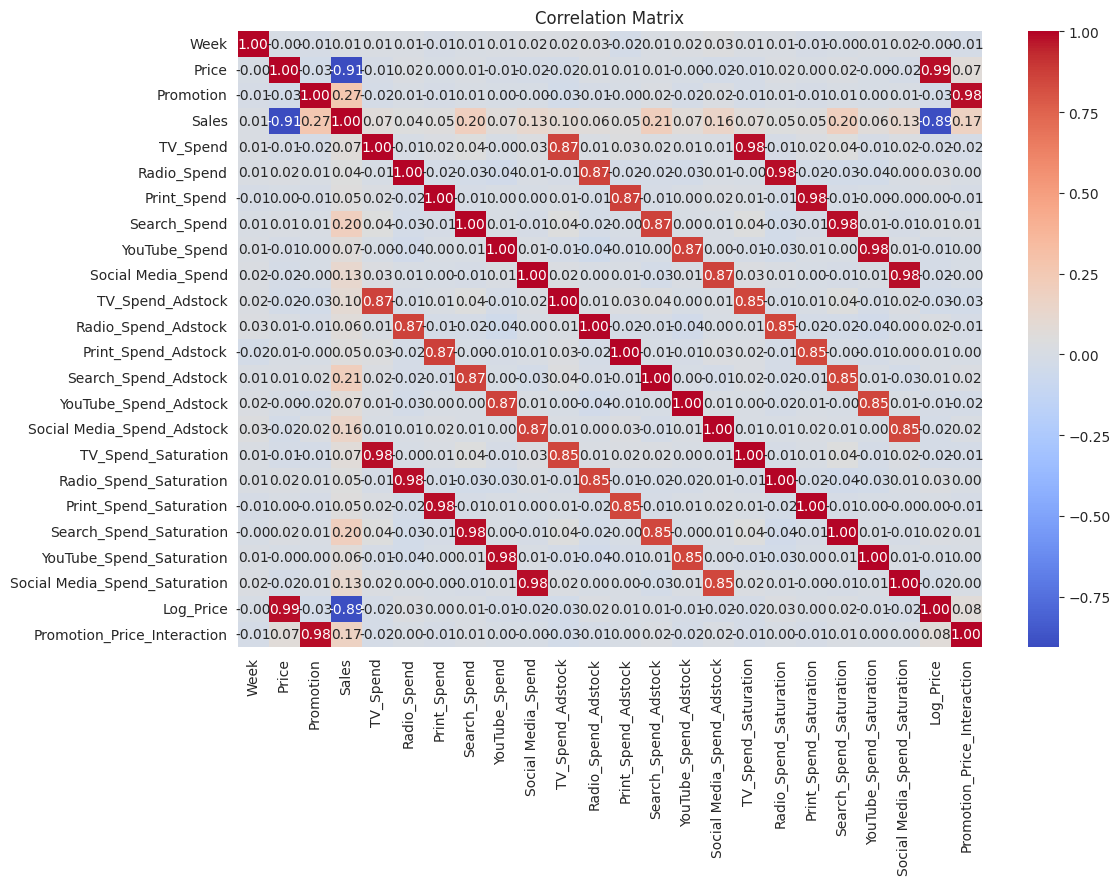

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Upload CSV File
df = pd.read_csv("/content/MMM brand data.csv")

# Define Adstock Function
def adstock(series, decay=0.5):
    result = np.zeros(len(series))
    result[0] = series[0]
    for t in range(1, len(series)):
        result[t] = series[t] + decay * result[t-1]
    return result

# Apply Adstock transformation
for channel in ["TV_Spend", "Radio_Spend", "Print_Spend", "Search_Spend", "YouTube_Spend", "Social Media_Spend"]:
    df[channel + "_Adstock"] = adstock(df[channel])

# Apply Saturation Effect using a Hill Function (β = 0.8, S = max spend)
beta = 0.8
S = df[["TV_Spend", "Radio_Spend", "Print_Spend", "Search_Spend", "YouTube_Spend", "Social Media_Spend"]].max().max()
for channel in ["TV_Spend", "Radio_Spend", "Print_Spend", "Search_Spend", "YouTube_Spend", "Social Media_Spend"]:
    df[channel + "_Saturation"] = (df[channel] ** beta) / (df[channel] ** beta + S ** beta)

# Log transform Price
df["Log_Price"] = np.log(df["Price"])

# Interaction of Promotion & Price
df["Promotion_Price_Interaction"] = df["Promotion"] * df["Log_Price"]

# Define independent variables
X = df[["Log_Price", "Promotion", "Promotion_Price_Interaction"]]
for channel in ["TV_Spend", "Radio_Spend", "Print_Spend", "Search_Spend", "YouTube_Spend", "Social Media_Spend"]:
    X[channel + "_Adstock"] = df[channel + "_Adstock"]
    X[channel + "_Saturation"] = df[channel + "_Saturation"]

# Define dependent variable
y = df["Sales"]

# Add constant for regression
X = sm.add_constant(X)

# Run OLS Regression Model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

# Generate Correlation Matrix
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
